# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [44]:
# Import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

import random

## Data Observation & Cleaning

1. Load and preview data
2. Check the type of data
3. Find missing data
4. Remove the outliner

In [2]:
# Load and preview data
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

### Column Names and Descriptions for Kings County Data Set

* **id** - unique identified for a house
* **date** - date house was sold
* **price** - price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
# Check data type and observe data
print(df.info())
for column in df:
    print(column, ' : ', df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Fix object type data
df['date'] = pd.to_datetime(df['date'])
df['year'],df['month'],df['day'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.dayofweek
df.drop('date', axis=1, inplace=True)

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x=='?' else x)
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
# Check missing data
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year                0
month               0
day                 0
dtype: int64

In [6]:
# Observe missing value
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['yr_renovated'].unique())

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [7]:
# Fix missing data
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

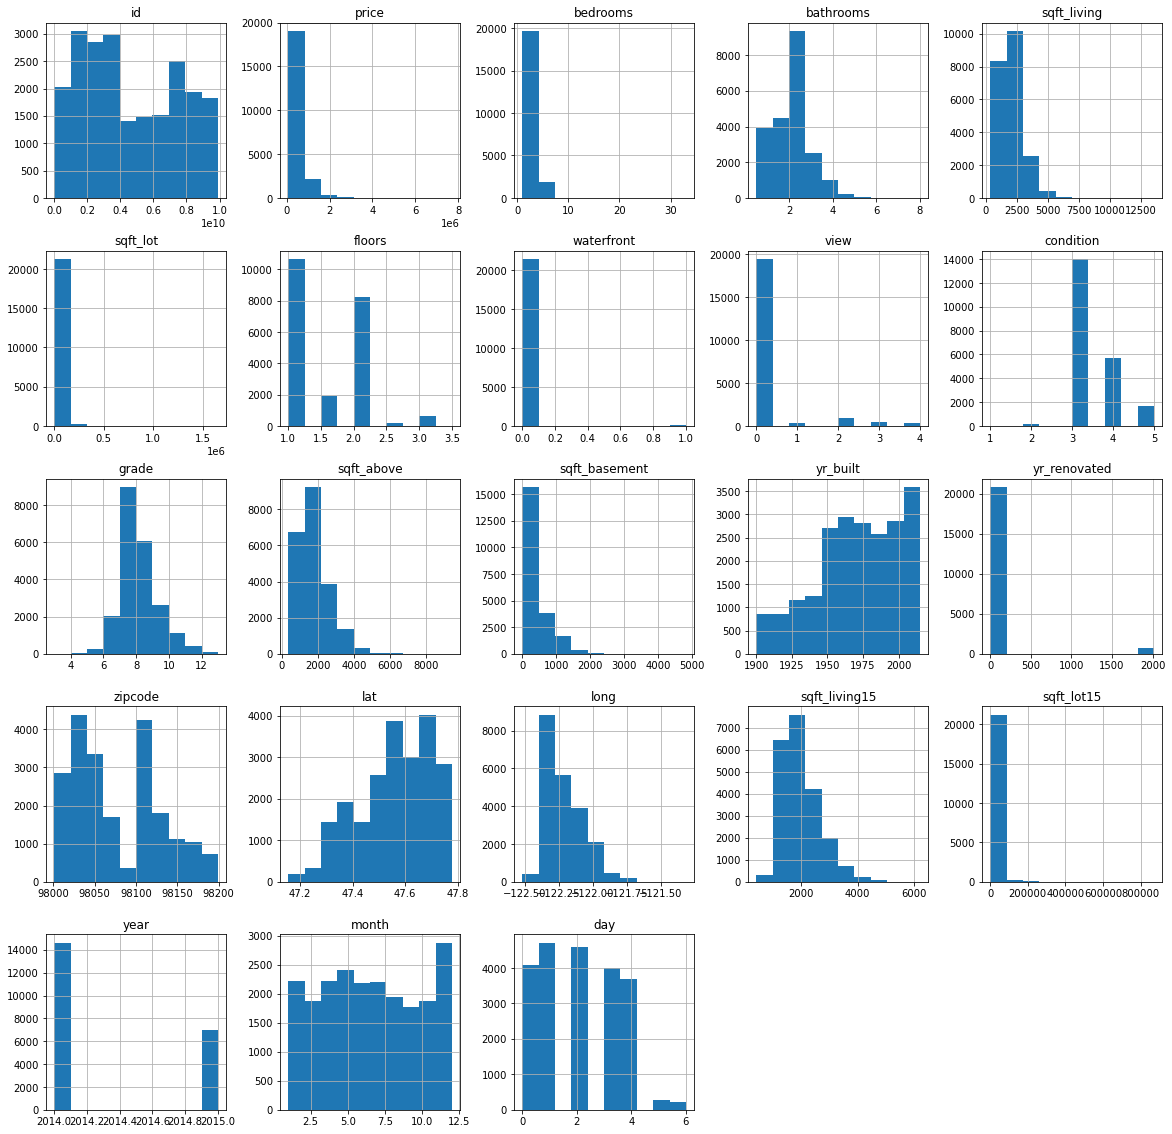

In [8]:
# Observe the distribution of data
df.hist(figsize=(20,20))
plt.show()

In [9]:
# Set data category
categoricals1 = ['bedrooms', 'bathrooms'] #2
categoricals2 = ['sqft_living', 'sqft_above', 'sqft_basement',
                 'sqft_living15', 'sqft_lot15', 'sqft_lot'] #6
categoricals3 = ['price'] #1
categoricals4 = ['grade', 'view', 'condition', 'floors', 'waterfront'] #5
categoricals5 = ['zipcode', 'lat', 'long'] #3
categoricals6 = ['yr_built', 'yr_renovated', 'year', 'month', 'day'] #5

In [10]:
# Create function to find upper and lower bound
def upper_bound(data, column):
    q75, q25 = np.percentile(data[column], [75, 25])
    iqr = q75 - q25
    upper = q75 + iqr*1.5
    return upper
def lower_bound(data, column):
    q75, q25 = np.percentile(data[column], [75, 25])
    iqr = q75 - q25
    lower = q25 - iqr*1.5
    return lower

In [11]:
# Check outliner in data in Category 1
for col in categoricals1:
    print(col, 'upper bound : ', upper_bound(df, col))
    print(col, 'lower bound : ', lower_bound(df, col), '\n')

bedrooms upper bound :  5.5
bedrooms lower bound :  1.5 

bathrooms upper bound :  3.625
bathrooms lower bound :  0.625 



In [12]:
# Remove outliner from data in Category 1
df = df.loc[df['bathrooms']<=4]
df = df.loc[df['bedrooms'] <= 6]

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


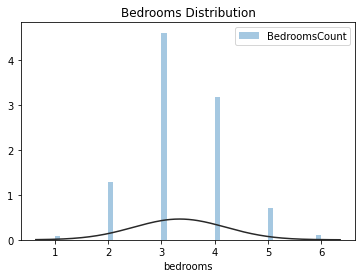

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


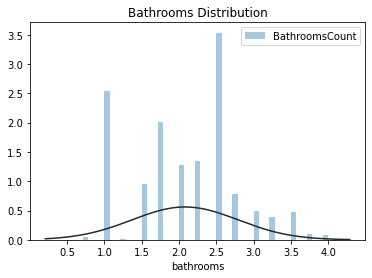

In [13]:
# Recheck the distribution of data in Category 1
for col in categoricals1:
    name = str(col).capitalize()
    sns.distplot(df[col], label= name + 'Count',fit=norm, kde=False)
    plt.title(name + ' Distribution')
    plt.legend()
    plt.show()

In [14]:
# Check outliner in data in Category 2
for col in categoricals2:
    print(col, 'upper bound : ', upper_bound(df, col))
    print(col, 'lower bound : ', lower_bound(df, col), '\n')

sqft_living upper bound :  4145.0
sqft_living lower bound :  -215.0 

sqft_above upper bound :  3665.0
sqft_above lower bound :  -295.0 

sqft_basement upper bound :  1325.0
sqft_basement lower bound :  -795.0 

sqft_living15 upper bound :  3630.0
sqft_living15 lower bound :  190.0 

sqft_lot15 upper bound :  17400.0
sqft_lot15 lower bound :  -2280.0 

sqft_lot upper bound :  18822.75
sqft_lot lower bound :  -3253.25 



In [15]:
# Remove outliner from data in Category 2
df = df.loc[df['sqft_living'] <= 4200]
df = df.loc[df['sqft_above'] <= 3700]
df = df.loc[df['sqft_basement'] <= 3700]
df = df.loc[df['sqft_basement'] > 0]
df = df.loc[df['sqft_lot15'] <= 17500]
df = df.loc[df['sqft_lot'] <= 19000]

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


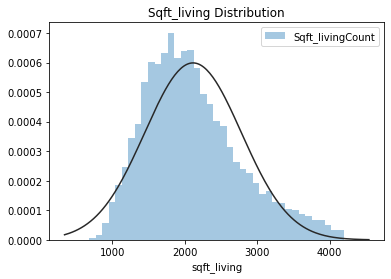

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


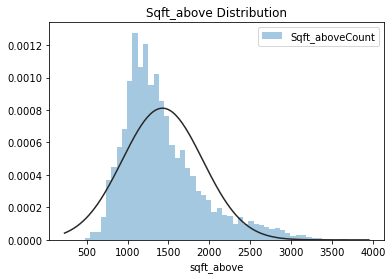

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


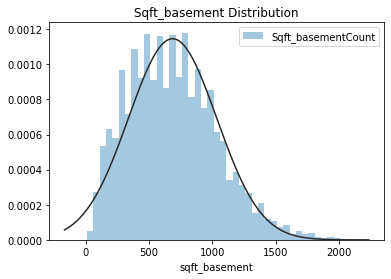

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


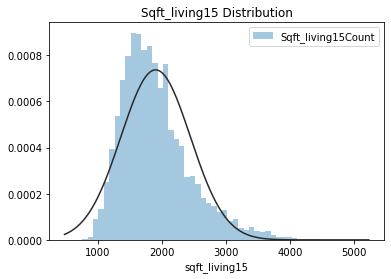

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


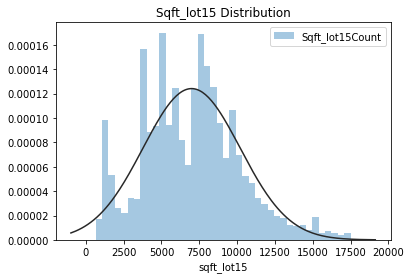

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


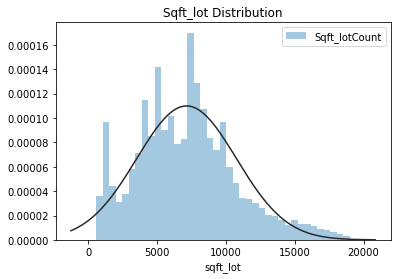

In [16]:
# Recheck the distribution of data in Category 2
for col in categoricals2:
    name = str(col).capitalize()
    sns.distplot(df[col], label= name + 'Count',fit=norm, kde=False)
    plt.title(name + ' Distribution')
    plt.legend()
    plt.show()

In [17]:
# Check outliner in data in Category 3
for col in categoricals3:
    print(col, 'upper bound : ', upper_bound(df, col))
    print(col, 'lower bound : ', lower_bound(df, col))

price upper bound :  1131250.0
price lower bound :  -102750.0


In [18]:
# Remove outliner from data in Category 3
df = df.loc[df['price'] <= 1500000]

C:\Users\KnotMirai\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


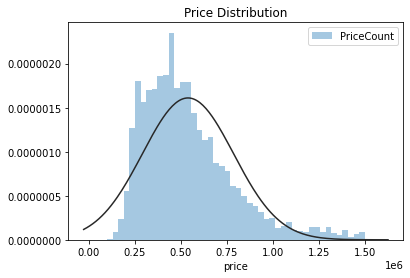

In [19]:
# Recheck the distribution of data in Category 3
for col in categoricals3:
    name = str(col).capitalize()
    sns.distplot(df[col], label= name + 'Count',fit=norm, kde=False)
    plt.title(name + ' Distribution')
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend()
    plt.show()

In [20]:
# Drop ID data
df.drop('id', axis=1, inplace=True)
df.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  538000.0         3       2.25         2570      7242     2.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
1   0.0          3      7  ...      1951        1991.0    98125  47.7210   
3   0.0          5      7  ...      1965           0.0    98136  47.5208   

      long  sqft_living15  sqft_lot15  year  month  day  
1 -122.319           1690        7639  2014     12    1  
3 -122.393           1360        5000  2014     12    1  

[2 rows x 22 columns]

## Exploratory Data Analysis (EDA)

Let find the answer to the questions below:

1. How does the location affect the price?
2. Do building and renovation times affect the price?
3. Does selling time affect the price?
4. Can we predict the price from a condition?

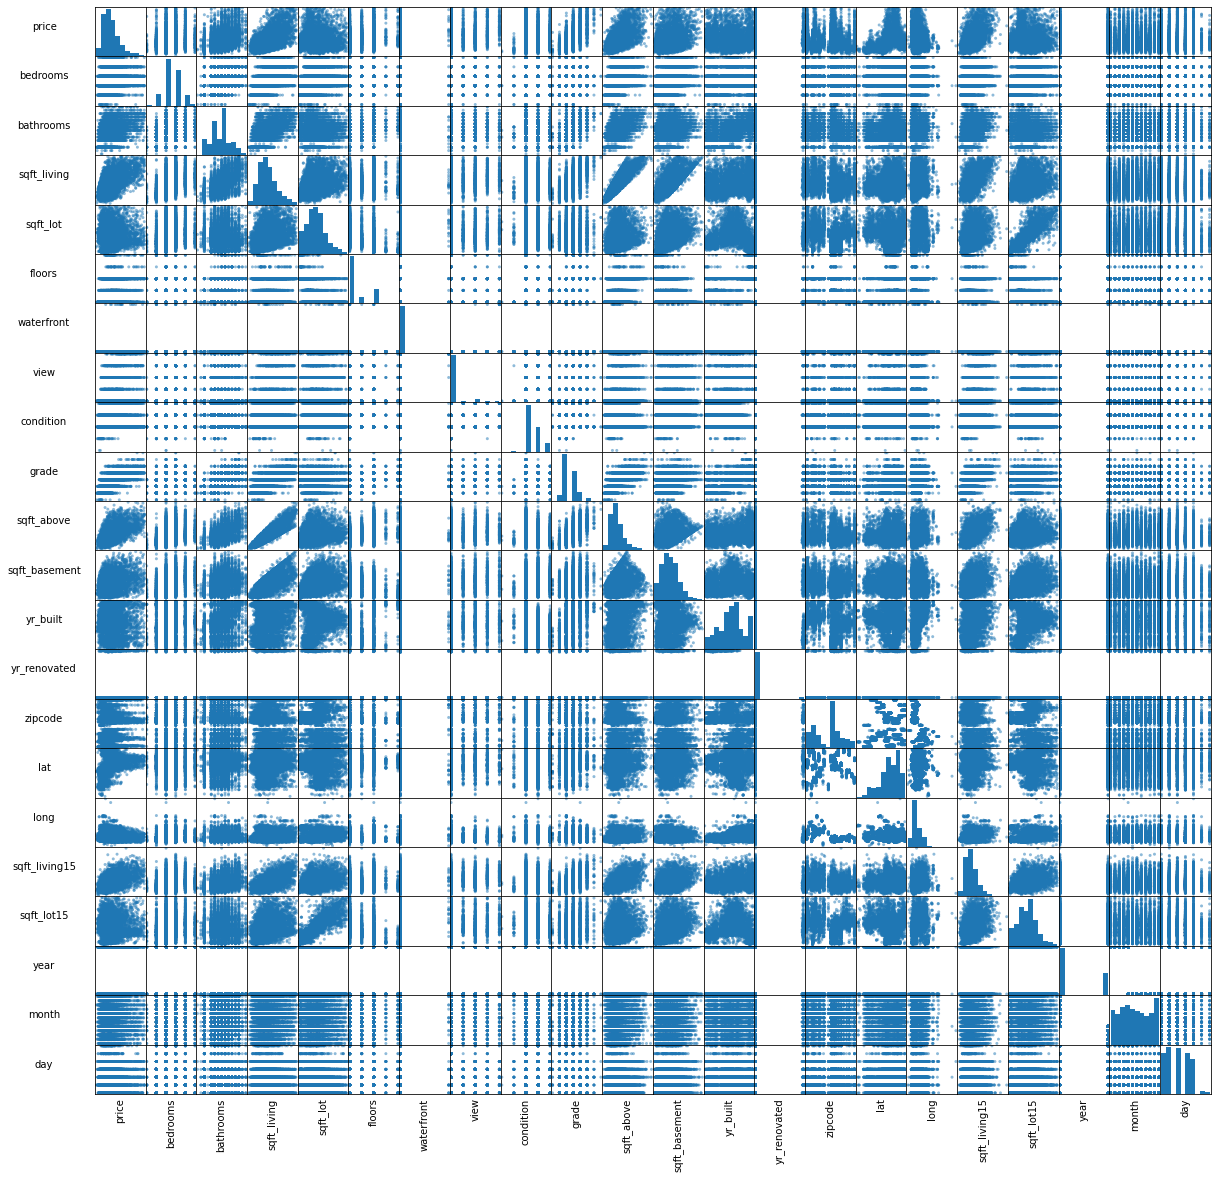

In [21]:
# Overall of data
sm = pd.plotting.scatter_matrix(df,figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

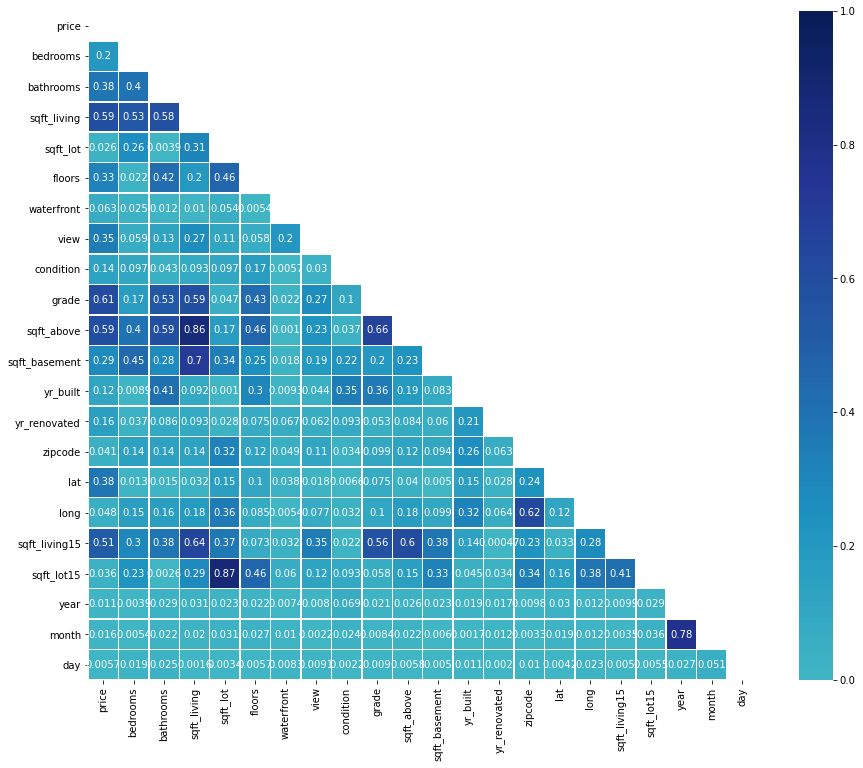

In [22]:
# Check the correlation of data 
data = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15', 'year', 'month', 'day']

mask = np.zeros_like(df[data].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(abs(df.corr()), linewidths=.5, vmin=0, vmax=1, cbar_kws={'shrink': .82}, 
            annot=True, cmap='YlGnBu', center=0, mask=mask, square=True);

### 1. How does the location affect the price?

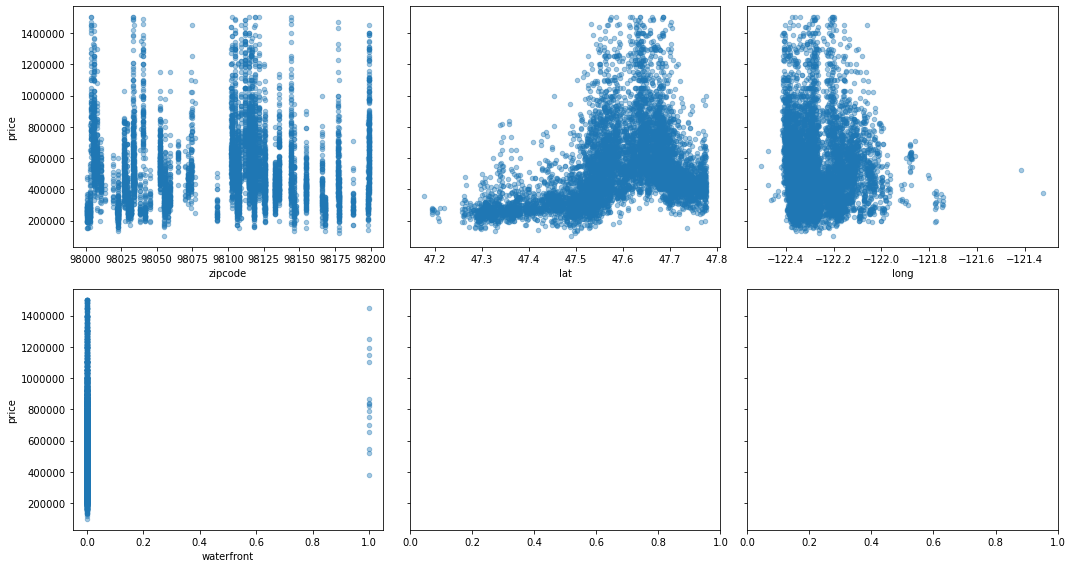

In [23]:
# Look at location data
fig5, axes5 = plt.subplots(nrows=2, ncols=3, figsize=(15,8), sharey=True)

categoricals5.append('waterfront')

for col, ax in zip(categoricals5, axes5.flatten()):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4)
    plt.ticklabel_format(useOffset=False, style='plain')
    
fig5.tight_layout()
categoricals5.remove('waterfront')

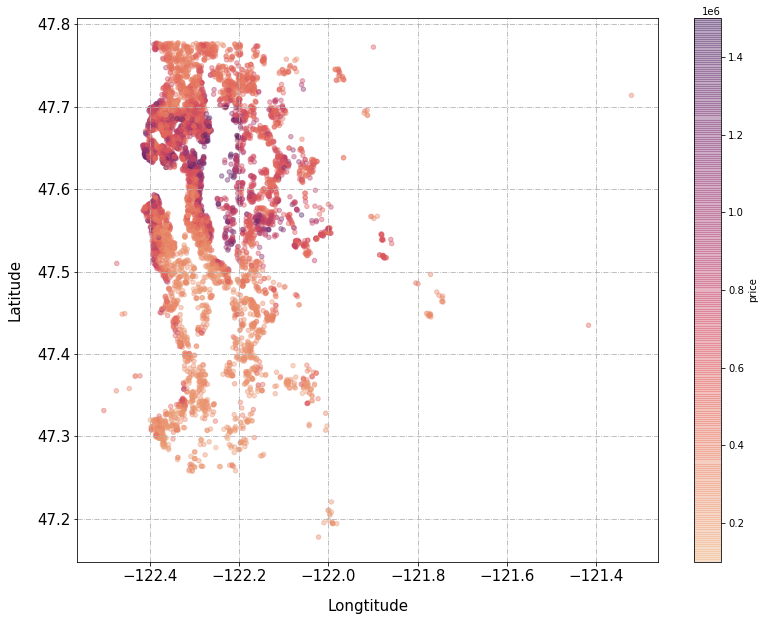

In [24]:
#View the relationship of price in map view
df.plot(kind='scatter', x='long', y='lat', fontsize= 15, alpha=0.4, figsize=(13,10), 
        c='price', cmap= 'flare', colorbar=True, sharex=False);
plt.xlabel('Longtitude', fontsize=15, labelpad= 15)
plt.ylabel('Latitude', fontsize=15, labelpad= 15)
plt.grid(True, linestyle='-.')
plt.show()

In [25]:
#Add real map background
fig = px.scatter_mapbox(df, lat='lat', lon='long', color='price', hover_name='price', hover_data=['bedrooms', 'bathrooms'],
                        color_discrete_sequence=['green'], size_max=15, zoom=8, width=850, height=600, 
                        center={'lat': 47.4, 'lon': -121.7}, mapbox_style='open-street-map')
fig.show(config={'scrollZoom': False})

In [26]:
# Check influence of water front data
df['waterfront_cat'] = df['waterfront'].apply(lambda x: 'waterfront' if x > 0 else 'not waterfront')
print('Mean prices for', df.groupby('waterfront_cat')['price'].mean(),'\n')
print('Median prices for', df.groupby('waterfront_cat')['price'].median())

Mean prices for waterfront_cat
not waterfront    539327.433018
waterfront        865531.250000
Name: price, dtype: float64 

Median prices for waterfront_cat
not waterfront    490000.0
waterfront        827500.0
Name: price, dtype: float64


### Summary for question 1:

The location data are zip code, latitude, longitude, and waterfront. Zipcode should not be the influence of selling since it is a number and does not reflect any meaning. Also, the graph is scattering. Latitude and longitude seem to influence. However, after plotting them as a map, it seems that the high selling is in a specific area, for example, near the sea or lake. This data matches with the data from the waterfront. The mean and median of the waterfront shows that the house on the waterfront area has a higher selling price. The additional information about location needs to be added in order to predict the selling price from a location.

### 2. Do built and renovated times affect the price?

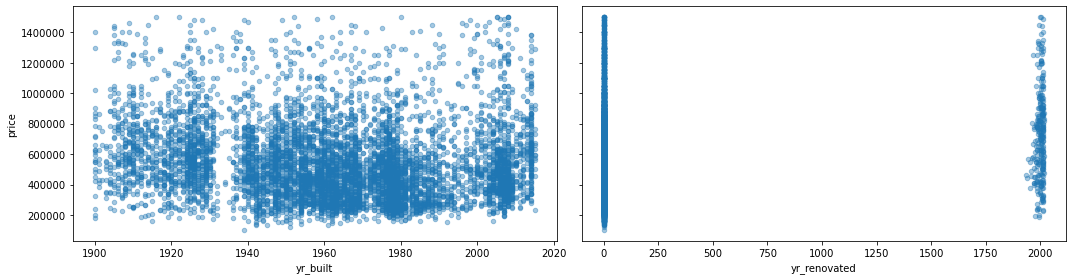

In [27]:
# Preview built and renovated year
fig6, axes6 = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

categoricals6.remove('year')
categoricals6.remove('month')
categoricals6.remove('day')

for col, ax in zip(categoricals6, axes6.flatten()):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4)
    plt.ticklabel_format(useOffset=False, style='plain')
    
fig6.tight_layout()
categoricals6.append('year')
categoricals6.append('month')
categoricals6.append('day')

Mean prices for yr_built_cat
1900-1939    639911.185238
1940-1979    503076.052348
1980-2019    538176.536572
Name: price, dtype: float64 

Median prices for yr_built_cat
1900-1939    597000.0
1940-1979    459975.0
1980-2019    475000.0
Name: price, dtype: float64


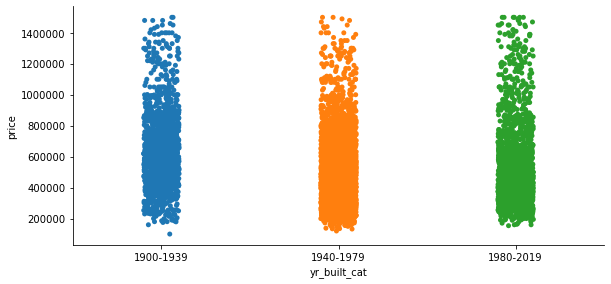

In [28]:
# Grouping for every 40 years and check influence of built year
df['yr_built_cat'] = df['yr_built'].apply(lambda x: ('1900-1939' if x <= 1939 else '1940-1979') if x <= 1979 else '1980-2019')
df['yr_built_cat'] = pd.Categorical(df['yr_built_cat'], categories = ['1900-1939', '1940-1979', '1980-2019'])

print('Mean prices for', df.groupby('yr_built_cat')['price'].mean(),'\n')
print('Median prices for', df.groupby('yr_built_cat')['price'].median())

sns.catplot(x='yr_built_cat', y='price', data=df, height=4, aspect=2);
plt.ticklabel_format(style='plain', axis='y')

Mean prices for renovated
original     532330.073109
renovated    731288.941176
Name: price, dtype: float64 

Median prices for renovated
original     484000.0
renovated    721000.0
Name: price, dtype: float64


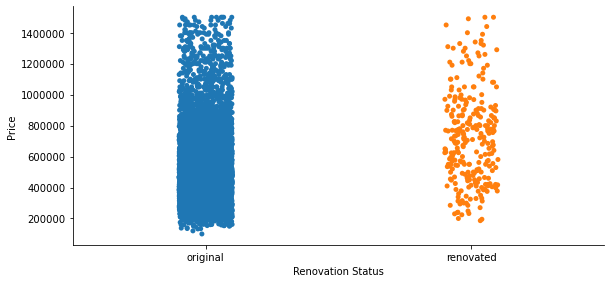

In [29]:
# Grouping renovated/not renovate type and check influence
df['renovated'] = df['yr_renovated'].apply(lambda x: 'renovated' if x > 0 else 'original')
df['renovated'] = pd.Categorical(df['renovated'], categories = ['original', 'renovated'])
print('Mean prices for', df.groupby('renovated')['price'].mean(),'\n')
print('Median prices for', df.groupby('renovated')['price'].median())

sns.catplot(x='renovated', y='price', data=df, height=4, aspect=2);
plt.xlabel('Renovation Status')
plt.ylabel('Price');
plt.ticklabel_format(style='plain', axis='y')

Correlation : 0.17049274627545183


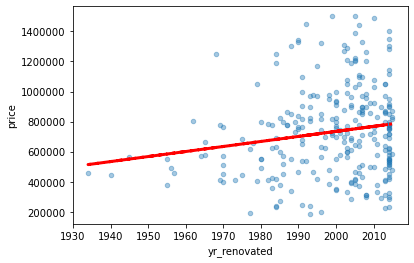

In [30]:
# Check the influence of renovation year
df_reno = df.loc[df['yr_renovated'] > 0]
df_reno.plot(kind='scatter', x='yr_renovated', y='price', alpha=0.4)
plt.ticklabel_format(useOffset=False, style='plain');

m1, c1 = np.polyfit(df_reno['yr_renovated'], df_reno['price'], 1)
plt.plot(df_reno['yr_renovated'], (df_reno['yr_renovated']*m1 + c1) ,
         color='red', linewidth=3, linestyle='-.');

print('Correlation :', df_reno.corr()['price']['yr_renovated'])

### Summary for question 2:

From mean and median data of built year, the houses that built during 1900-1939 have a higher selling price. From data, the renovation increase the selling price of the house. The price definitely increases after renovation. However, the price still cannot be predicted by only the renovation year.

### 3. Does selling time affect the price?

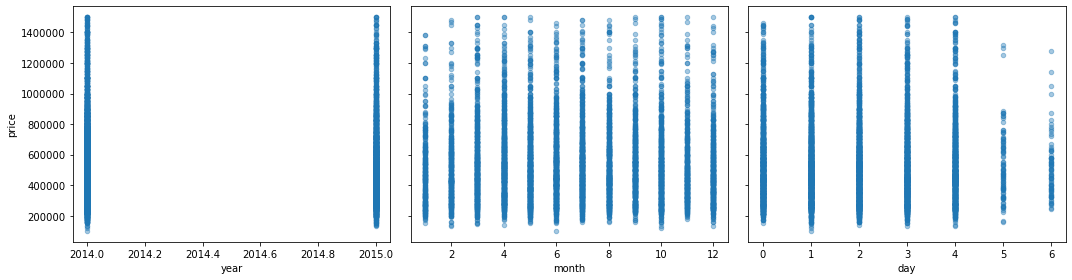

In [31]:
# Look at selling time data
fig6, axes6 = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True)

categoricals6.remove('yr_built')
categoricals6.remove('yr_renovated')


for col, ax in zip(categoricals6, axes6.flatten()):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4)
    plt.ticklabel_format(useOffset=False, style='plain')
    
fig6.tight_layout()
categoricals6.append('yr_built')
categoricals6.append('yr_renovated')

Mean prices for year
2014    538130.161706
2015    544165.609507
Name: price, dtype: float64 

Median prices for year
2014    489000.0
2015    499000.0
Name: price, dtype: float64


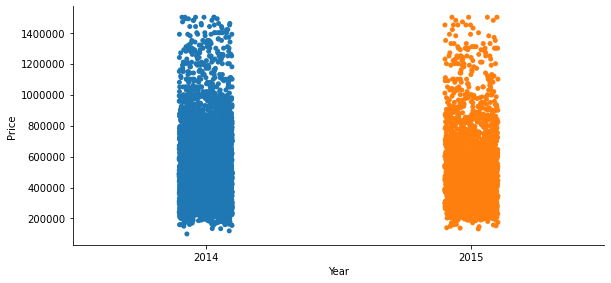

In [32]:
# Check influence of selling year
print('Mean prices for', df.groupby('year')['price'].mean(),'\n')
print('Median prices for', df.groupby('year')['price'].median())

sns.catplot(x='year', y='price', data=df, height=4, aspect=2);
plt.xlabel('Year')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

Mean prices for month
1     503889.095563
2     516137.470149
3     559946.545455
4     558848.351279
5     542727.649616
6     548684.892608
7     551874.480826
8     533385.799685
9     547451.909091
10    538674.302885
11    521162.961538
12    514382.538306
Name: price, dtype: float64 

Median prices for month
1     464000.0
2     462000.0
3     505400.0
4     515000.0
5     495000.0
6     490000.0
7     511015.5
8     470000.0
9     509500.0
10    490500.0
11    460000.0
12    465500.0
Name: price, dtype: float64


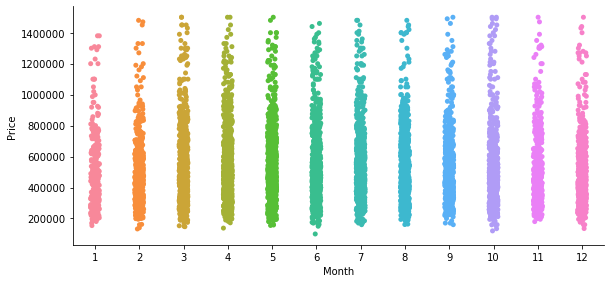

In [33]:
# Check influence of selling month
print('Mean prices for', df.groupby('month')['price'].mean(),'\n')
print('Median prices for', df.groupby('month')['price'].median())

sns.catplot(x='month', y='price', data=df, height=4, aspect=2);
plt.xlabel('Month')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

Mean prices for day_cat
weekday    540430.406543
weekend    525963.441860
Name: price, dtype: float64 

Median prices for day_cat
weekday    490000.0
weekend    484000.0
Name: price, dtype: float64


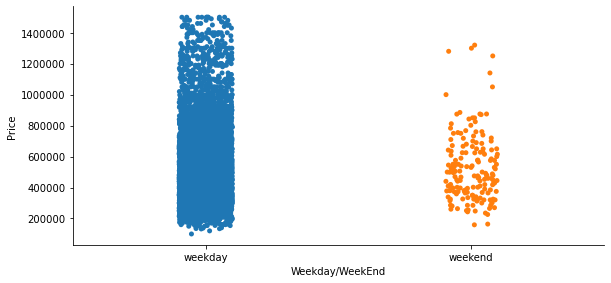

In [34]:
# Grouping as a weekday/weekend and check influence of selling day
df['day_cat'] = df['day'].apply(lambda x: 'weekday' if x < 5 else 'weekend')
print('Mean prices for', df.groupby('day_cat')['price'].mean(),'\n')
print('Median prices for', df.groupby('day_cat')['price'].median())

sns.catplot(x='day_cat', y='price', data=df, height=4, aspect=2);
plt.xlabel('Weekday/WeekEnd')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

### Summary for question 3:

After observing the data, it seems that there is no effect on selling price from selling time. The mean and median of year, month, and day seem to be the same.

### 4. Can we predict the price from a condition?

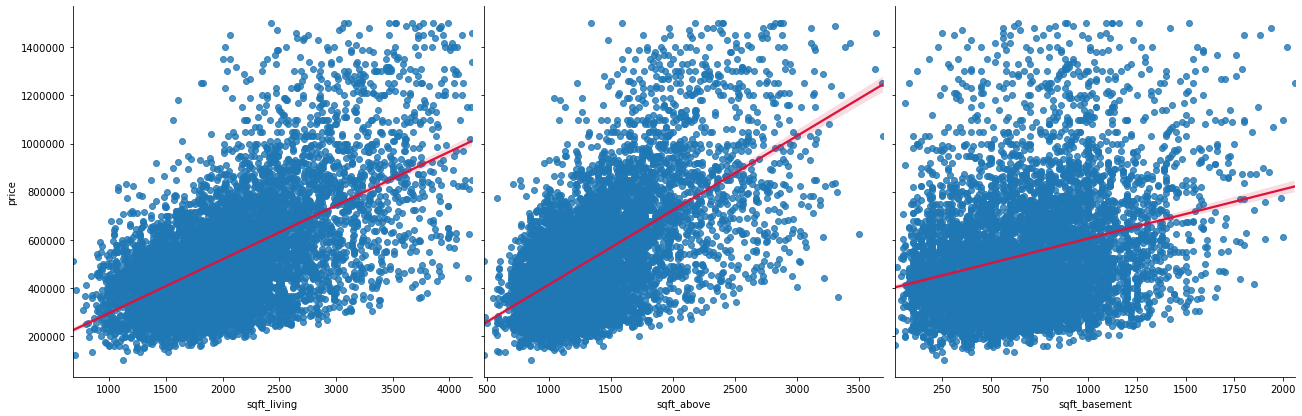

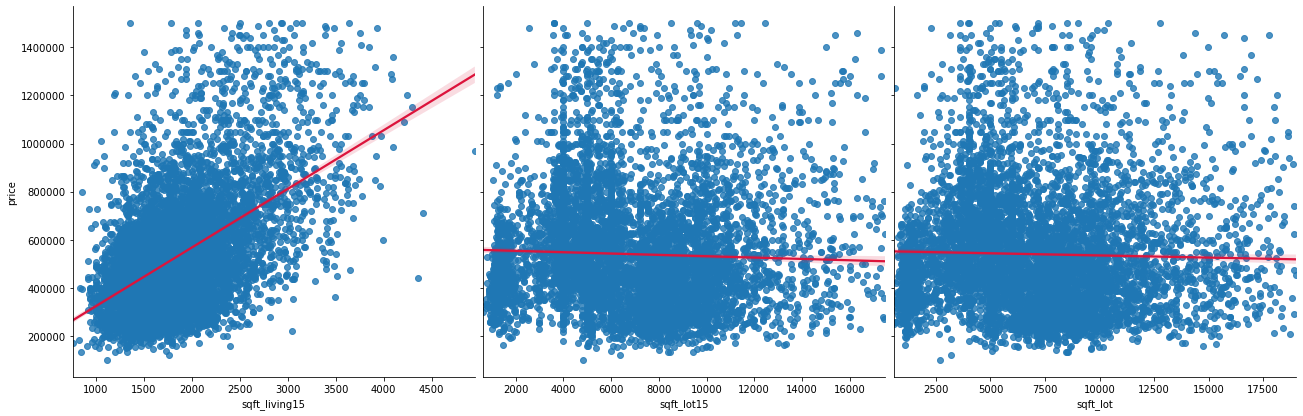

In [35]:
# Preview the relationship of price and area data
sns.pairplot(x_vars=['sqft_living', 'sqft_above', 'sqft_basement'], y_vars='price',
             data=df, kind='reg',diag_kind=None, plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=1);
plt.ticklabel_format(useOffset=False, style='plain')

sns.pairplot(x_vars=['sqft_living15', 'sqft_lot15', 'sqft_lot'], y_vars='price',
             data=df, kind='reg',diag_kind=None, plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=1);
plt.ticklabel_format(useOffset=False, style='plain')

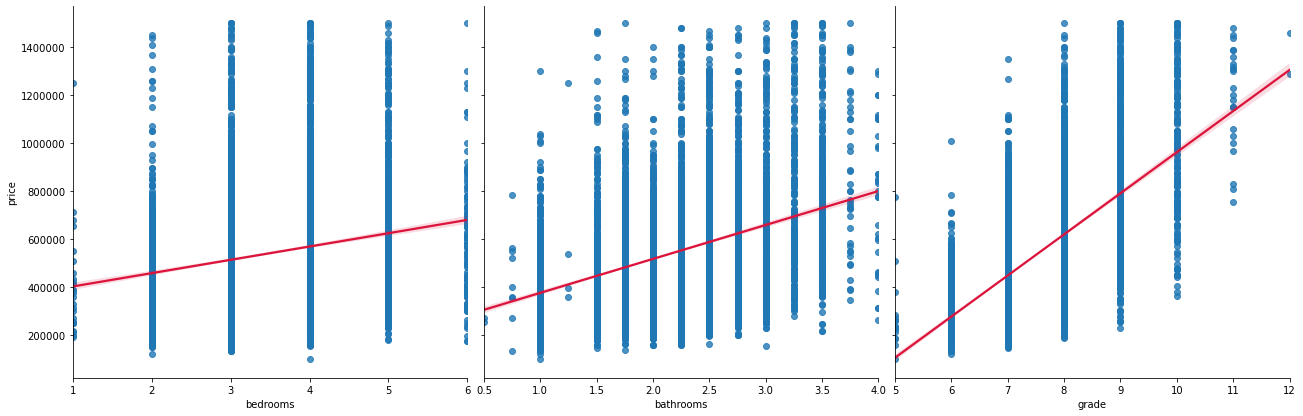

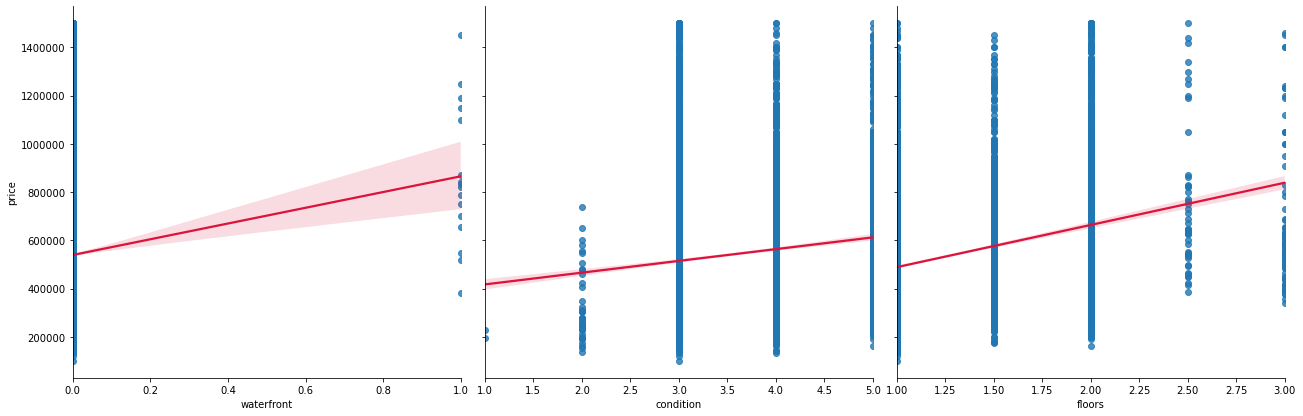

In [36]:
# Preview the relationship of price and conditional data
sns.pairplot(x_vars=['bedrooms', 'bathrooms','grade'], y_vars='price',
             data=df, kind='reg',diag_kind=None, plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=1);
plt.ticklabel_format(useOffset=False, style='plain')

sns.pairplot(x_vars=['waterfront', 'condition', 'floors'], y_vars='price',
             data=df, kind='reg',diag_kind=None, plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=1);
plt.ticklabel_format(useOffset=False, style='plain')

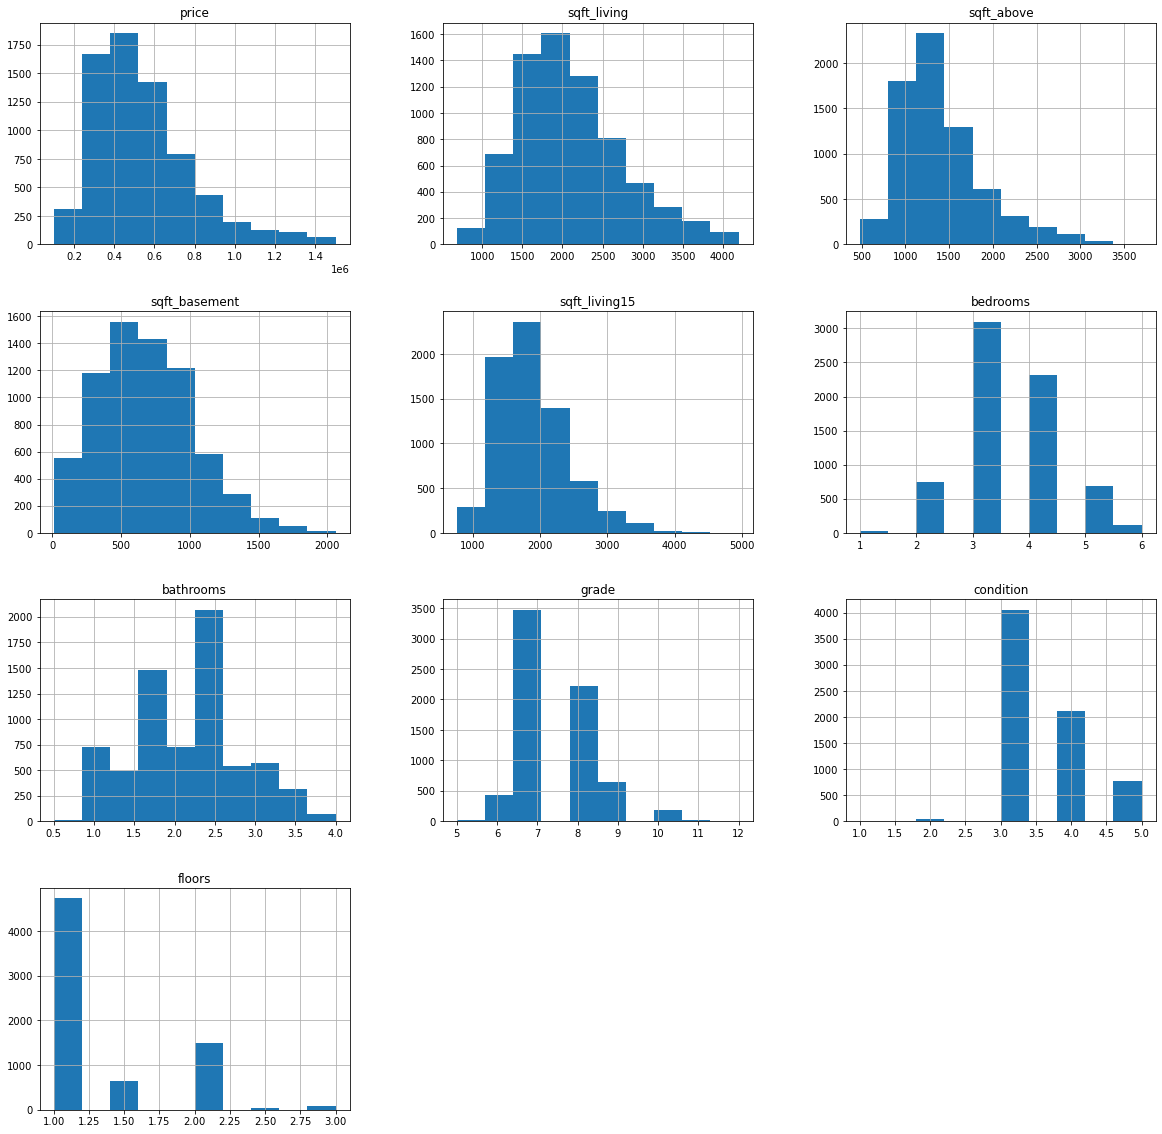

In [37]:
# Preview histogram of selected data
selected_factor = ['price','sqft_living', 'sqft_above', 'sqft_basement','sqft_living15',
                   'bedrooms', 'bathrooms','grade', 'condition', 'floors']

df[selected_factor].hist(figsize=(20,20))
plt.show()

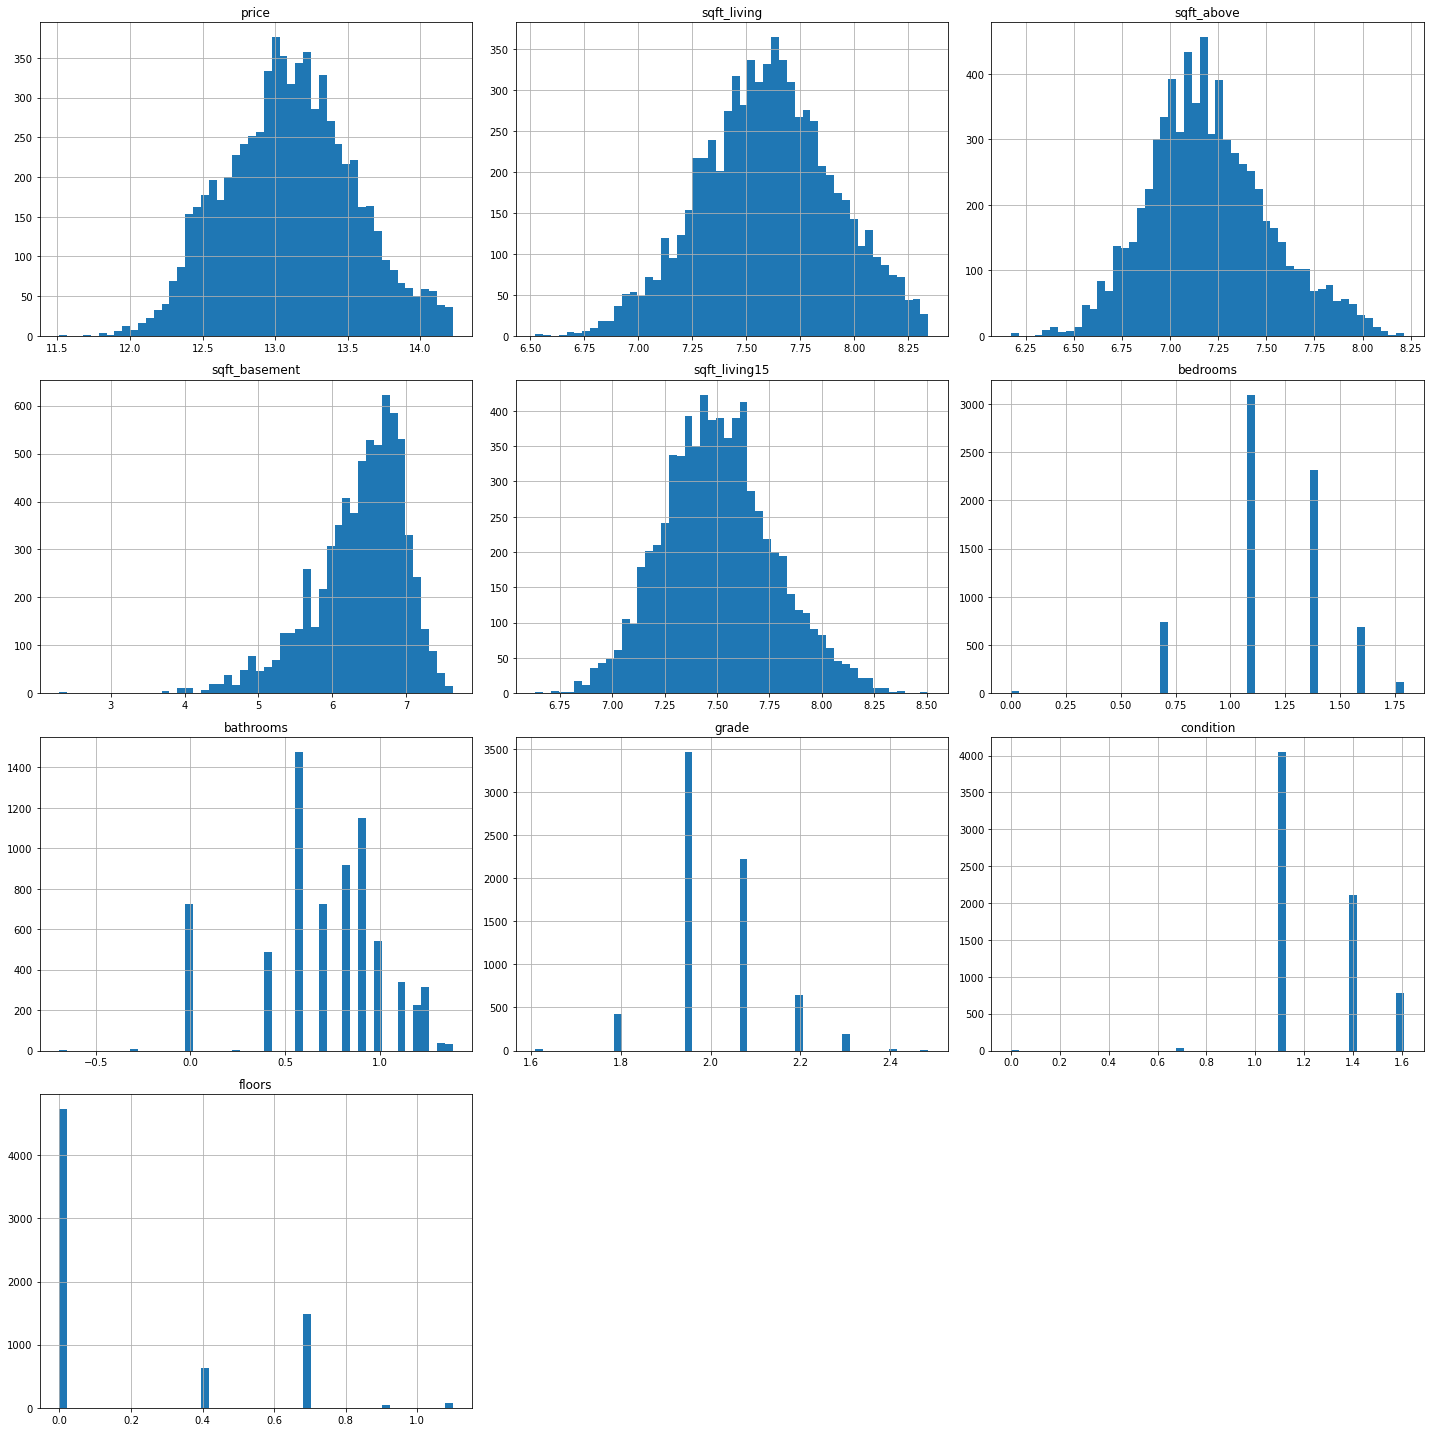

In [38]:
# log transformation and preview histogram of selected data
df_log = pd.DataFrame([])

for column in df[selected_factor]:
    df_log[column] = np.log(df[selected_factor][column])

fig = df_log.hist(bins=50,figsize=(20,20))
plt.tight_layout();
plt.show()

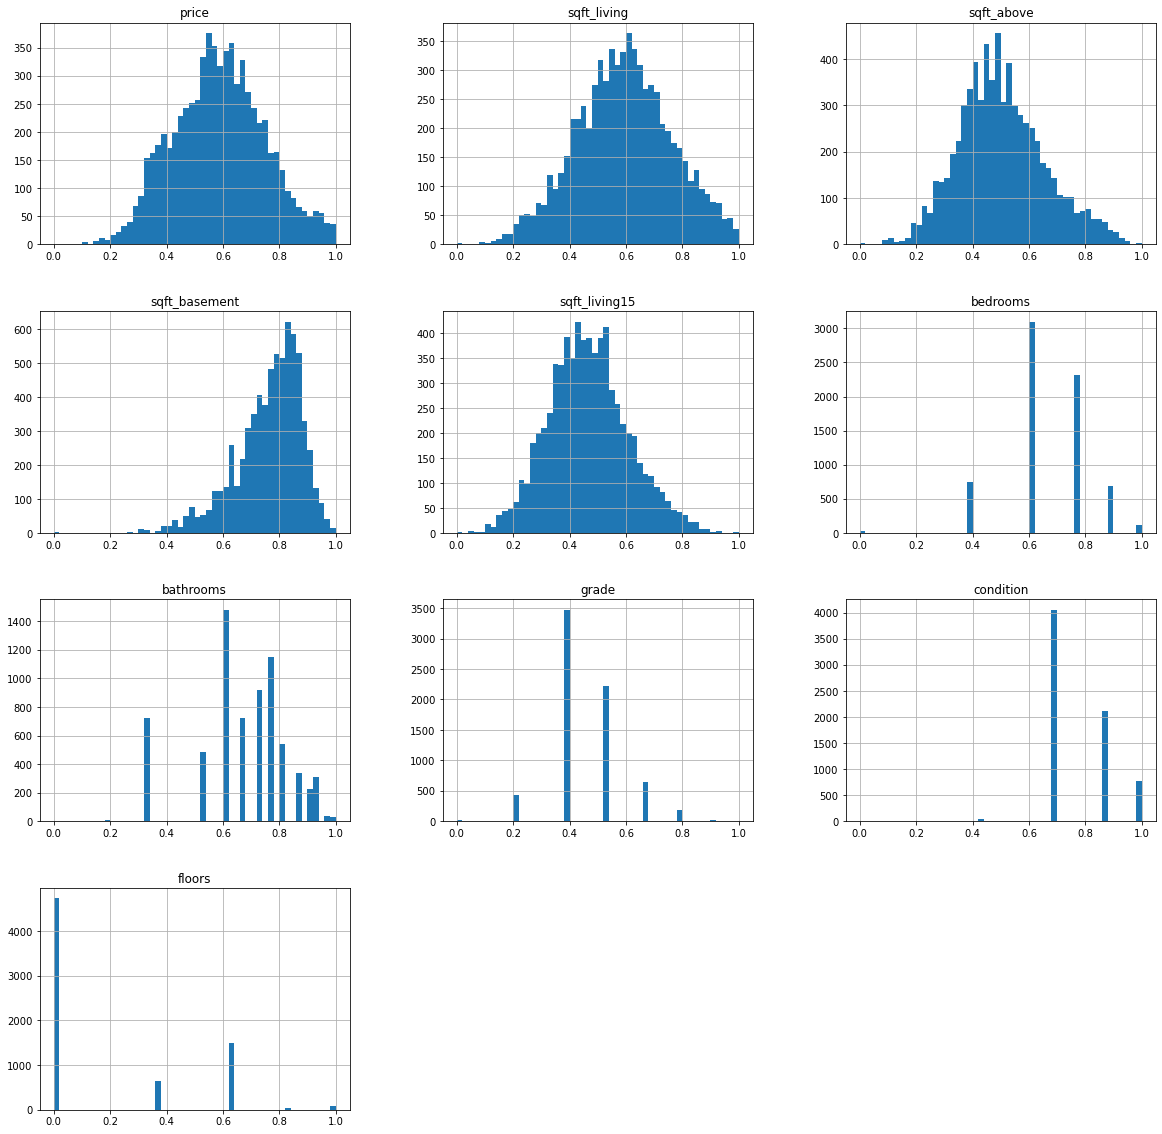

In [39]:
# Min-max scaling and preview histogram of selected data
df_log_scaled = pd.DataFrame([])
for column in df_log.columns:
    x = df_log[column]
    df_log_scaled[column] = (x - min(x)) / (max(x) - min(x))
    
df_log_scaled.hist(bins=50, figsize=(20, 20));
plt.show()

In [40]:
# Prepare data for prediction model
selected_factor_noprice = ['sqft_living', 'sqft_above', 'sqft_basement','sqft_living15',
                           'bedrooms', 'bathrooms','grade', 'condition', 'floors']
y = df_log_scaled['price']
X = df_log_scaled[selected_factor_noprice]

# Perform a train-testsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

5590 1398 5590 1398


In [45]:
# 1st approach
# Fit the model to train data
model = sm.OLS(y_train, X_train).fit()

# Print model data
print(model.summary(), '\n')

# Calculate predictions on training and test sets
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate the Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          1.568e+04
Date:                Mon, 24 May 2021   Prob (F-statistic):                        0.00
Time:                        20:31:38   Log-Likelihood:                          3965.2
No. Observations:                5590   AIC:                                     -7912.
Df Residuals:                    5581   BIC:                                     -7853.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [46]:
# 2nd approach
#linear regression final model
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)

# Print model coefficients
print('Factors','\t','Estimated Coefficient')
for fac, coef in zip(X_train, reg.coef_):
    if len(fac) < 7:
        print(fac,'\t\t', coef)
    else:
        print(fac,'\t', coef)
print('\n')

# Calculate predictions on training and test sets       
y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate the Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Factors 	 Estimated Coefficient
sqft_living 	 0.20664932337535385
sqft_above 	 0.04472057088747834
sqft_basement 	 0.05741090513243453
sqft_living15 	 0.18712368750057717
bedrooms 	 -0.06970625200302333
bathrooms 	 -0.06336971645891752
grade 		 0.39860740438032105
condition 	 0.25568178351115756
floors 		 0.11251368176755087


Train Mean Squarred Error: 0.01417106149621563
Test Mean Squarred Error: 0.014334953915793956


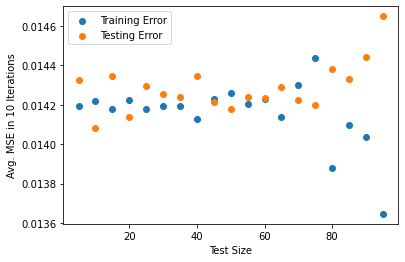

In [54]:
# Evaluate the effect of train-test split size
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        reg.fit(X_train, y_train)
        y_hat_train = reg.predict(X_train)
        y_hat_test = reg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Avg. MSE in 10 Iterations')
plt.legend()
plt.show()

### Summary for question 4:

After observing the data, factors, that could be used for the prediction model, are the square footage of the home, square footage of house apart from the basement, square footage of the basement, square footage of interior housing living space for the nearest 15 neighbors, number of bedrooms and bathrooms, grade, house condition and number of floors.

Est.Price = 0.23x *sqft_living* + 0.12x *sqft_above* + 0.12x *sqft_basement* + 0.09x *sqft_living15* - 0.05x *bedrooms* - 0.08x *bathrooms* + 0.33x *grade* + 0.22x *condition* +0.11x *floors*